In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [18]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, confusion_matrix, auc
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.feature_selection import SequentialFeatureSelector
import numpy as np
data = pd.read_csv('diabetes.csv') 
data_origin = data.copy()
data


ModuleNotFoundError: No module named 'matplotlib.backends.registry'

# Data Processing(EDA)


In [26]:
# Check basic information about the dataset (number of rows, non-null values per column, data types)
print("Dataset Info:")
print(data.info())

# Check for outliers using descriptive statistics
print("\nDescriptive Statistics:")
print(data.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Descriptive Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.10546

In [27]:

# Check key statistics (max, min, mean, std)
print("\nKey Statistics (max, min, mean, std):")
print(data.describe().loc[['mean', 'std', 'min', 'max']])


Key Statistics (max, min, mean, std):
      Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
mean     3.845052  120.894531      69.105469      20.536458   79.799479   
std      3.369578   31.972618      19.355807      15.952218  115.244002   
min      0.000000    0.000000       0.000000       0.000000    0.000000   
max     17.000000  199.000000     122.000000      99.000000  846.000000   

            BMI  DiabetesPedigreeFunction        Age   Outcome  
mean  31.992578                  0.471876  33.240885  0.348958  
std    7.884160                  0.331329  11.760232  0.476951  
min    0.000000                  0.078000  21.000000  0.000000  
max   67.100000                  2.420000  81.000000  1.000000  


c:\Users\saidi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\saidi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\saidi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\saidi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

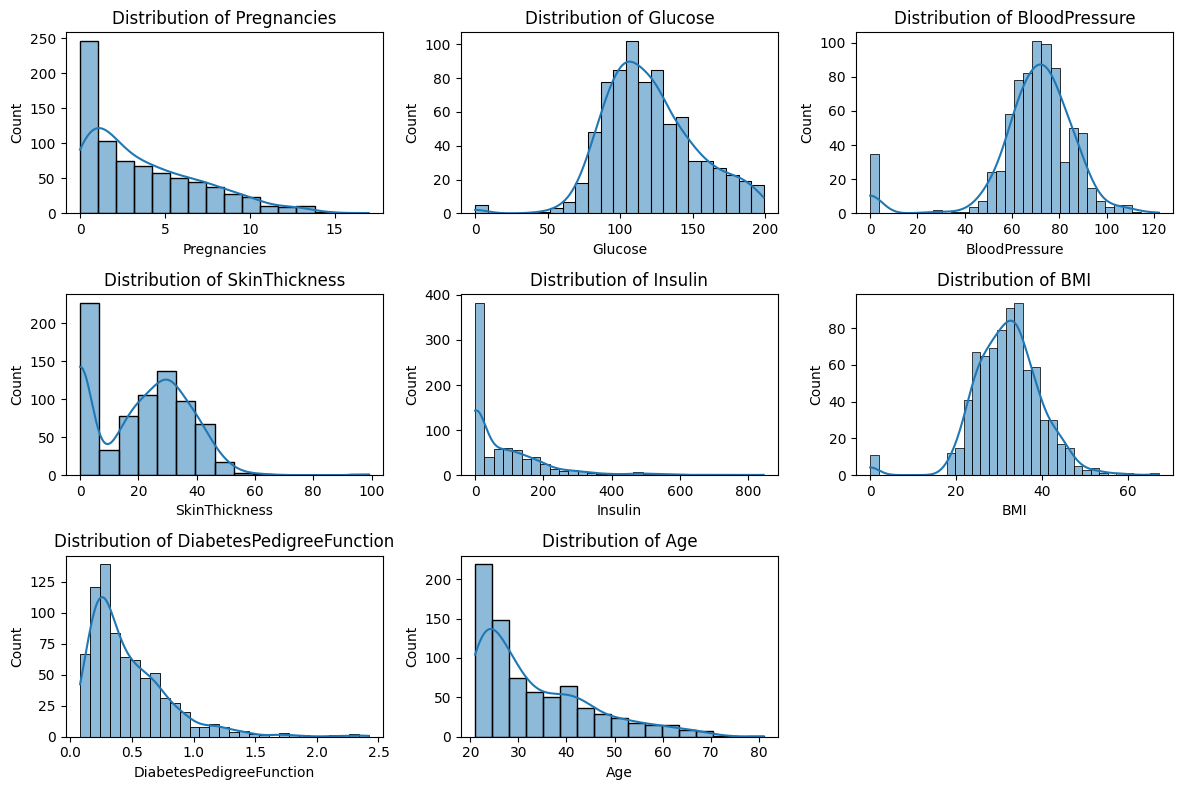

In [28]:

# Plot distribution of each feature
plt.figure(figsize=(12, 8))
for i, col in enumerate(data.columns[:-1]):  # Ignoring 'Outcome' column
    plt.subplot(3, 3, i+1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# outliers
The original dataset contained outliers and missing values, particularly in the BloodPressure, SkinThickness, Insulin, and BMI columns.
After removing records with outliers, the dataset was reduced from the original 768 records to 394 records.

In [29]:
# Remove outliers by filtering out invalid values
data = data[data['BloodPressure'] > 0]
data = data[data['SkinThickness'] > 0]
data = data[data['Insulin'] > 0]

print(f"Cleaned data shape: {data.shape}")

# Reset index after cleaning
data = data.reset_index(drop=True)
df = data.copy()


Cleaned data shape: (394, 9)


# XGB、RANDOM FOREST 、KNN 、SVM(rbf)  

Random Forest Accuracy: 0.7721518987341772
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        54
           1       0.67      0.56      0.61        25

    accuracy                           0.77        79
   macro avg       0.74      0.72      0.72        79
weighted avg       0.76      0.77      0.77        79

SVM Accuracy: 0.7721518987341772
              precision    recall  f1-score   support

           0       0.79      0.91      0.84        54
           1       0.71      0.48      0.57        25

    accuracy                           0.77        79
   macro avg       0.75      0.69      0.71        79
weighted avg       0.76      0.77      0.76        79

KNN Accuracy: 0.7848101265822784
              precision    recall  f1-score   support

           0       0.84      0.85      0.84        54
           1       0.67      0.64      0.65        25

    accuracy                           0.78        79
   macro avg       

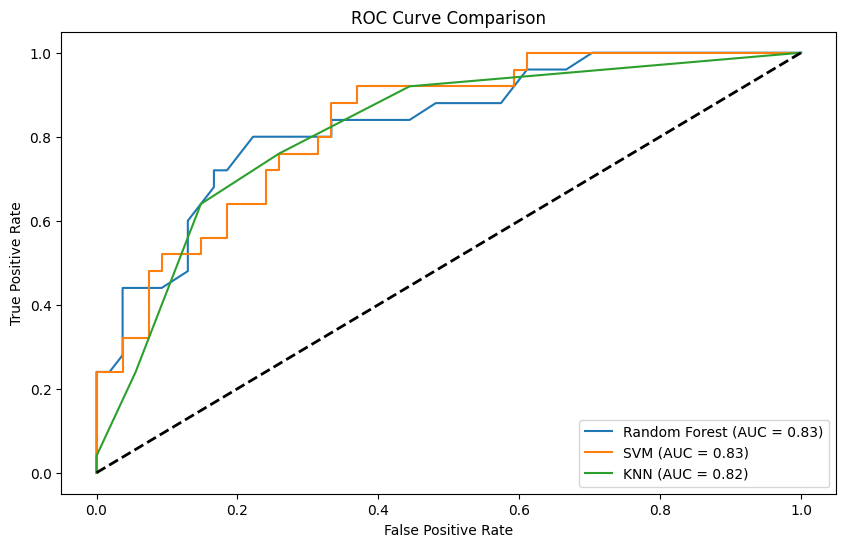

In [30]:

# Define features (X) and labels (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# General function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    print(f"{model_name} Accuracy: {accuracy}")
    print(classification_report(y_true, y_pred))
    return accuracy

# Function to plot ROC curve
def plot_roc_curve(y_true, y_proba, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    auc = roc_auc_score(y_true, y_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
    return auc

# Create figure for ROC curves
plt.figure(figsize=(10, 6))

### Model 3: Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # Random Forest does not require scaling
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate Random Forest
evaluate_model(y_test, y_pred_rf, "Random Forest")
plot_roc_curve(y_test, y_proba_rf, "Random Forest")

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model 1: SVM (RBF kernel)
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
y_proba_svm = svm_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate SVM
evaluate_model(y_test, y_pred_svm, "SVM")
plot_roc_curve(y_test, y_proba_svm, "SVM")

### Model 2: KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
y_proba_knn = knn_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate KNN
evaluate_model(y_test, y_pred_knn, "KNN")
plot_roc_curve(y_test, y_proba_knn, "KNN")

# Display ROC curve
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Baseline
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# t-SNE
**t-SNE was used to analyze data imbalance; the classes were imbalanced, and there was overlap in the data.**

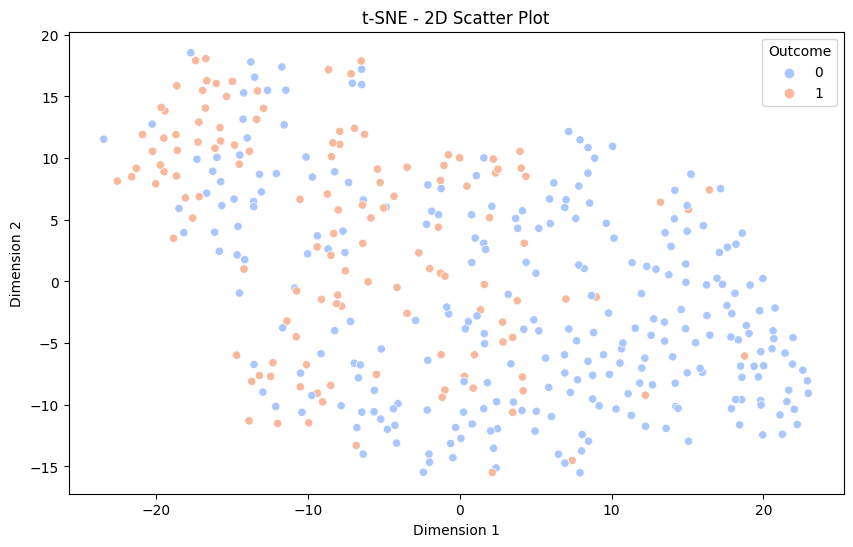

In [31]:
# Copy the data
data1 = data.copy()

# 1. Load the data, separate features and labels
X = data1.drop('Outcome', axis=1)  # Features
y = data1['Outcome']  # Labels

# 2. Standardize features (PCA and t-SNE are sensitive to feature scales)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply TSNE to reduce dimensions to 2
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# 4. Store the TSNE result in a DataFrame and add labels
tsne_df = pd.DataFrame(data=X_tsne, columns=['Dimension 1', 'Dimension 2'])
tsne_df['Outcome'] = y.values

# 5. Plot the 2D scatter plot (t-SNE result)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Outcome', data=tsne_df, palette='coolwarm')
plt.title('t-SNE - 2D Scatter Plot')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

# Feature Selection WRAPPER (Results may vary each time)
* All models selected Glucose and Age as important features.
* BMI was selected by most models.
* Each model had unique selections:
* Random Forest: DiabetesPedigreeFunction
* XGBoost: Insulin
* KNN: Pregnancies and Insulin
* SVM: SkinThickness and BloodPressure


In [32]:
# ---------------------------------------------------
# Split features and labels
X = data.drop('Outcome', axis=1)  # Feature set
y = data['Outcome']  # Label set

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform feature selection using Sequential Feature Selector (SFS) for Random Forest
sfs_rf = SequentialFeatureSelector(rf_model, n_features_to_select=5, direction='forward')
sfs_rf.fit(X_train, y_train)

# Get selected features
selected_features_rf = X.columns[sfs_rf.get_support()]
print("Selected Features for Random Forest:", selected_features_rf)

# ---------------------------------------------------
# Perform feature selection for XGBoost
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
sfs_xgb = SequentialFeatureSelector(xgb_model, n_features_to_select=5, direction='forward')
sfs_xgb.fit(X_train, y_train)

# Get selected features
selected_features_xgb = X.columns[sfs_xgb.get_support()]
print("Selected Features for XGBoost:", selected_features_xgb)

# ---------------------------------------------------
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---------------------------------------------------
# Perform feature selection for KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
sfs_knn = SequentialFeatureSelector(knn_model, n_features_to_select=5, direction='forward')
sfs_knn.fit(X_train, y_train)

# Get selected features
selected_features_knn = X.columns[sfs_knn.get_support()]
print("Selected Features for KNN:", selected_features_knn)

# ---------------------------------------------------
# Define and perform feature selection for SVM
svm_model = SVC(kernel='rbf', probability=True)

# Perform Sequential Feature Selector (SFS) for SVM
sfs_svm = SequentialFeatureSelector(svm_model, n_features_to_select=5, direction='forward')
sfs_svm.fit(X_train, y_train)

# Get selected features
selected_features_svm = X.columns[sfs_svm.get_support()]
print("Selected Features for SVM:", selected_features_svm)

Selected Features for Random Forest: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI'], dtype='object')
Selected Features for XGBoost: Index(['Pregnancies', 'Glucose', 'Insulin', 'DiabetesPedigreeFunction', 'Age'], dtype='object')
Selected Features for KNN: Index(['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'Age'], dtype='object')
Selected Features for SVM: Index(['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Age'], dtype='object')


In [33]:
#  Resample data using SMOTE + ENN and SMOTE + Tomek Links

X = data.drop('Outcome', axis=1)
y = data['Outcome']

# SMOTE + ENN
smote_enn = SMOTEENN(random_state=42)
X_resampled_enn, y_resampled_enn = smote_enn.fit_resample(X, y)

# SMOTE + Tomek Links
smote_tomek = SMOTETomek(random_state=42)
X_resampled_tomek, y_resampled_tomek = smote_tomek.fit_resample(X, y)

In [34]:
#  Define model evaluation function, with optional scaling
def evaluate_model(model, X, y, selected_features, need_scaling=False):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    X_selected = X[selected_features]
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
    
    # Apply scaling if needed
    if need_scaling:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=skf, scoring='accuracy')
    print(f"\n{model.__class__.__name__} - Cross Validation Accuracy: {np.mean(cv_scores):.4f}")
    
    # Train and test the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Display confusion matrix and classification report
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix:\n{cm}")
    print(classification_report(y_test, y_pred))
    
    # ROC curve
    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(X_test)[:, 1]
    else:
        # For SVM, if probability=True is not enabled, use decision_function
        y_pred_prob = model.decision_function(X_test)
        y_pred_prob = (y_pred_prob - y_pred_prob.min()) / (y_pred_prob.max() - y_pred_prob.min())  # Scale to [0,1]
        
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    return fpr, tpr, roc_auc

In [35]:

# Define models
rf_model = RandomForestClassifier(random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)
svm_model = SVC(kernel='rbf', probability=True)


# SMOTE + ENN Results
print("SMOTE + ENN Results:")

print("\nRandom Forest:")
fpr_rf, tpr_rf, roc_auc_rf = evaluate_model(rf_model, X_resampled_enn, y_resampled_enn, selected_features_rf, need_scaling=False)

print("\nKNN:")
fpr_knn, tpr_knn, roc_auc_knn = evaluate_model(knn_model, X_resampled_enn, y_resampled_enn, selected_features_knn, need_scaling=True)

print("\nSVM:")
fpr_svm, tpr_svm, roc_auc_svm = evaluate_model(svm_model, X_resampled_enn, y_resampled_enn, selected_features_svm, need_scaling=True)


SMOTE + ENN Results:

Random Forest:

RandomForestClassifier - Cross Validation Accuracy: 0.9283
Confusion Matrix:
[[26  2]
 [ 3 32]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.91        28
           1       0.94      0.91      0.93        35

    accuracy                           0.92        63
   macro avg       0.92      0.92      0.92        63
weighted avg       0.92      0.92      0.92        63


KNN:

KNeighborsClassifier - Cross Validation Accuracy: 0.9124
Confusion Matrix:
[[22  6]
 [ 2 33]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        28
           1       0.85      0.94      0.89        35

    accuracy                           0.87        63
   macro avg       0.88      0.86      0.87        63
weighted avg       0.88      0.87      0.87        63


SVM:

SVC - Cross Validation Accuracy: 0.9404
Confusion Matrix:
[[25  3]
 [ 4 31]]
              precision    

In [37]:
# SMOTE + Tomek Links Results
print("\nSMOTE + Tomek Links Results:")

print("\nRandom Forest:")
fpr_rf_t, tpr_rf_t, roc_auc_rf_t = evaluate_model(rf_model, X_resampled_tomek, y_resampled_tomek, selected_features_rf, need_scaling=False)

print("\nKNN:")
fpr_knn_t, tpr_knn_t, roc_auc_knn_t = evaluate_model(knn_model, X_resampled_tomek, y_resampled_tomek, selected_features_knn, need_scaling=True)

print("\nSVM:")
fpr_svm_t, tpr_svm_t, roc_auc_svm_t = evaluate_model(svm_model, X_resampled_tomek, y_resampled_tomek, selected_features_svm, need_scaling=True)



SMOTE + Tomek Links Results:

Random Forest:

RandomForestClassifier - Cross Validation Accuracy: 0.7991
Confusion Matrix:
[[39  8]
 [ 8 46]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        47
           1       0.85      0.85      0.85        54

    accuracy                           0.84       101
   macro avg       0.84      0.84      0.84       101
weighted avg       0.84      0.84      0.84       101


KNN:

KNeighborsClassifier - Cross Validation Accuracy: 0.7990
Confusion Matrix:
[[36 11]
 [10 44]]
              precision    recall  f1-score   support

           0       0.78      0.77      0.77        47
           1       0.80      0.81      0.81        54

    accuracy                           0.79       101
   macro avg       0.79      0.79      0.79       101
weighted avg       0.79      0.79      0.79       101


SVM:

SVC - Cross Validation Accuracy: 0.7942
Confusion Matrix:
[[38  9]
 [ 9 45]]
              prec

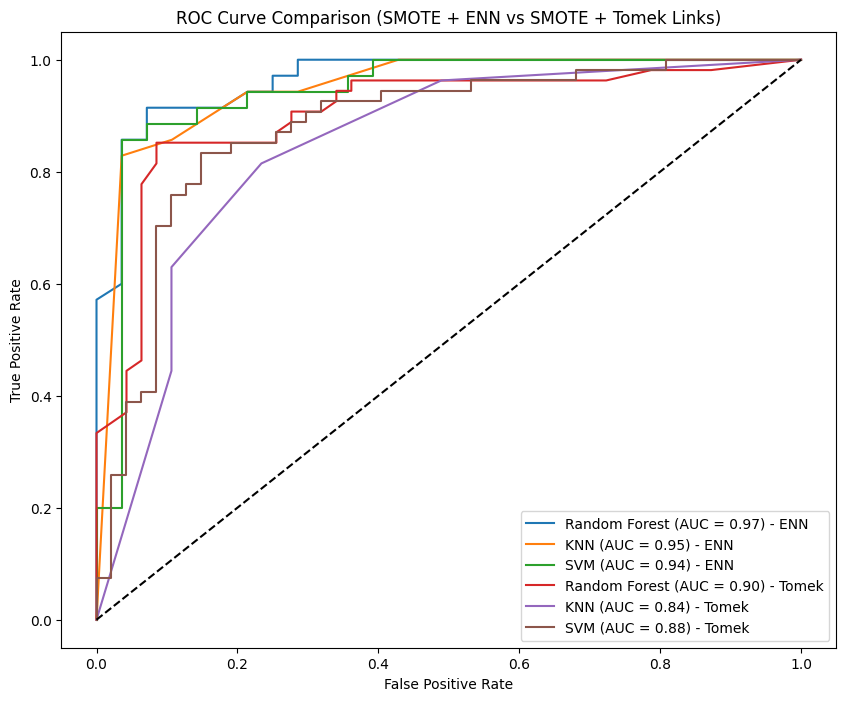

In [38]:
# 6. Plot ROC curves for comparison

plt.figure(figsize=(10, 8))

# SMOTE + ENN
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f}) - ENN')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f}) - ENN')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f}) - ENN')

# SMOTE + Tomek
plt.plot(fpr_rf_t, tpr_rf_t, label=f'Random Forest (AUC = {roc_auc_rf_t:.2f}) - Tomek')
plt.plot(fpr_knn_t, tpr_knn_t, label=f'KNN (AUC = {roc_auc_knn_t:.2f}) - Tomek')
plt.plot(fpr_svm_t, tpr_svm_t, label=f'SVM (AUC = {roc_auc_svm_t:.2f}) - Tomek')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve Comparison (SMOTE + ENN vs SMOTE + Tomek Links)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# > Model Performance Comparison
**Initial model performance:**


SVM (RBF Kernel) performed the best, with an accuracy of 73.38%.
Random Forest followed, with an accuracy of 72.08%.
KNN and XGBoost performed relatively worse, with accuracies of 69.48% and 68.83%, respectively.

**Model performance after using SMOTE + ENN:**

All models showed significant improvement.
Random Forest performed the best, with an accuracy of 94.02%.
SVM followed closely, with an accuracy of 93.20%.
XGBoost and KNN also showed substantial improvement, with accuracies of 92.65% and 90.76%, respectively.

**Model performance after using SMOTE + Tomek Links:**

Model performance improved, but not as significantly as with SMOTE + ENN.
Random Forest still performed the best, with an accuracy of 79.88%.
The accuracies of the other models ranged between 76% and 77%.

# Conclusion
* Feature selection and data balancing techniques significantly improved the performance of the diabetes classification models.
* SMOTE + ENN was more effective at enhancing model performance compared to SMOTE + Tomek Links.
* The Random Forest model consistently performed the best, especially after using SMOTE + ENN.
* Glucose, Age, and BMI were identified as the most important features for predicting diabetes.